<a href="https://colab.research.google.com/github/ZiyanAli69/Deep-learning-lab/blob/main/DL_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def train(X, Y, epochs, learning_rate):
    w1 = np.random.rand(2, 2)
    b1 = np.random.rand(1, 2)
    w2 = np.random.rand(2, 1)
    b2 = np.random.rand(1, 1)

    for epoch in range(epochs):
        z1 = np.dot(X, w1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, w2) + b2
        a2 = sigmoid(z2)

        error = Y - a2

        d_a2 = error * sigmoid_derivative(a2)
        d_w2 = np.dot(a1.T, d_a2)
        d_b2 = np.sum(d_a2, axis=0)

        d_a1 = np.dot(d_a2, w2.T) * sigmoid_derivative(a1)
        d_w1 = np.dot(X.T, d_a1)
        d_b1 = np.sum(d_a1, axis=0)

        w2 += learning_rate * d_w2
        b2 += learning_rate * d_b2
        w1 += learning_rate * d_w1
        b1 += learning_rate * d_b1

    return w1, b1, w2, b2

def predict(X, w1, b1, w2, b2):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return np.round(a2)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

epochs = 10000
learning_rate = 0.1
w1, b1, w2, b2 = train(X, Y, epochs, learning_rate)

for x, y in zip(X, Y):
    print(f"Input: {x}, Predicted: {predict(x, w1, b1, w2, b2)[0][0]}, Actual: {y[0]}")


Input: [0 0], Predicted: 0.0, Actual: 0
Input: [0 1], Predicted: 1.0, Actual: 1
Input: [1 0], Predicted: 1.0, Actual: 1
Input: [1 1], Predicted: 0.0, Actual: 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with SGD Optimizer:
Epoch 1/50 - SGD Loss: 1.0431
Epoch 2/50 - SGD Loss: 0.6744
Epoch 3/50 - SGD Loss: 0.6243
Epoch 4/50 - SGD Loss: 0.5969
Epoch 5/50 - SGD Loss: 0.5669
Epoch 6/50 - SGD Loss: 0.5455
Epoch 7/50 - SGD Loss: 0.5406
Epoch 8/50 - SGD Loss: 0.5246
Epoch 9/50 - SGD Loss: 0.5070
Epoch 10/50 - SGD Loss: 0.4999
Epoch 11/50 - SGD Loss: 0.4999
Epoch 12/50 - SGD Loss: 0.5064
Epoch 13/50 - SGD Loss: 0.4896
Epoch 14/50 - SGD Loss: 0.4736
Epoch 15/50 - SGD Loss: 0.4825
Epoch 16/50 - SGD Loss: 0.4679
Epoch 17/50 - SGD Loss: 0.4717
Epoch 18/50 - SGD Loss: 0.4639
Epoch 19/50 - SGD Loss: 0.4475
Epoch 20/50 - SGD Loss: 0.4578
Epoch 21/50 - SGD Loss: 0.4538
Epoch 22/50 - SGD Loss: 0.4495
Epoch 23/50 - SGD Loss: 0.4479
Epoch 24/50 - SGD Loss: 0.4430
Epoch 25/50 - SGD Loss: 0.4455
Epoch 26/50 - SGD Loss: 0.4389
Epoch 27/50 - SGD Loss: 0.4376
Epoch 28/50 - SGD Loss: 0.4378
Epoch 29/50 - SGD Loss: 0.4285
Epoch 30/50 - SGD Loss: 0.4274
Epoch 31/50 - SGD Loss: 0.4338
Epoch 32/50 - SGD 

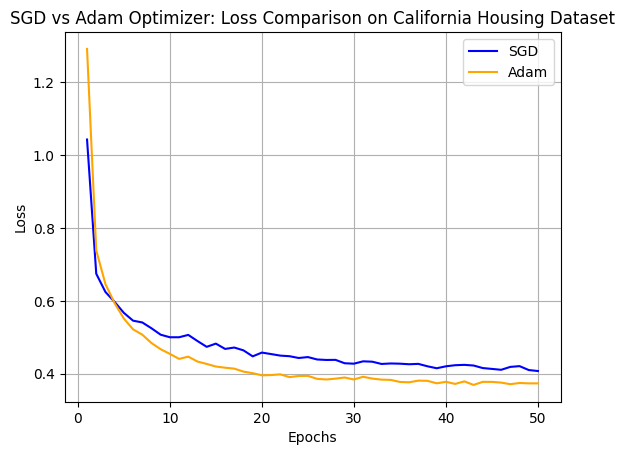

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
housing_data = fetch_california_housing()
X = housing_data.data
y = housing_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_data():
    return X_train, y_train

def create_model():
    model = models.Sequential([
        layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(20, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])
    return model

def train_model(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []

    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch + 1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")
    return history

X, y = create_data()
model_sgd = create_model()
model_adam = create_model()
optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32

# Training SGD optim
print("\nTraining with SGD Optimizer:")
sgd_loss = train_model(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

# Training Adam optim
print("\nTraining with Adam Optimizer:")
adam_loss = train_model(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')
#plotting graph
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss Comparison on California Housing Dataset')
plt.legend()
plt.grid(True)
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 72ms/step - accuracy: 0.3742 - loss: 1.9297 - val_accuracy: 0.5577 - val_loss: 1.2458
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.5761 - loss: 1.2005 - val_accuracy: 0.5732 - val_loss: 1.2114
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 71ms/step - accuracy: 0.6421 - loss: 1.0361 - val_accuracy: 0.6705 - val_loss: 0.9533
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.6737 - loss: 0.9332 - val_accuracy: 0.7074 - val_loss: 0.8384
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 70ms/step - accuracy: 0.6964 - loss: 0.8777 - val_accuracy: 0.5832 - val_loss: 1.2994
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5826 - loss: 1.3095
Test Accuracy: 0.5831999778747559


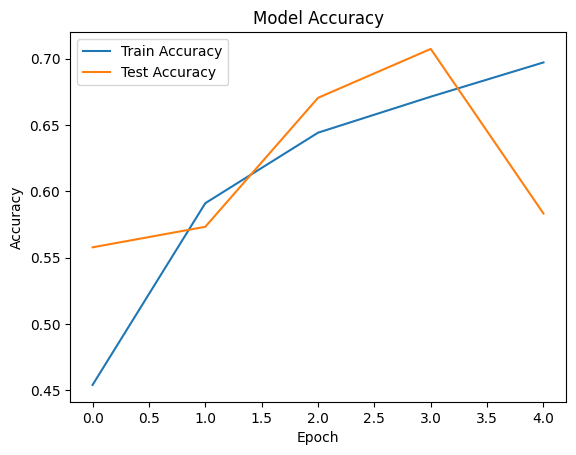

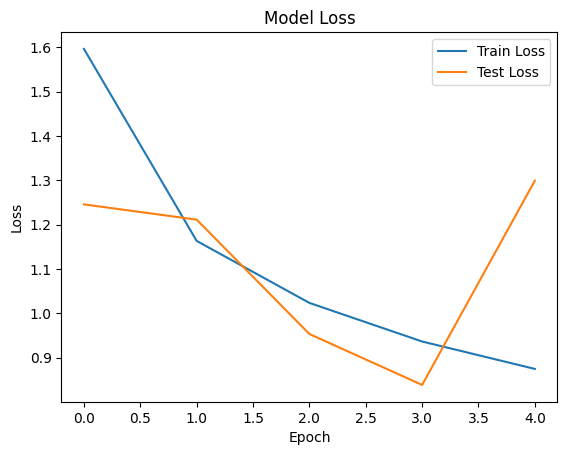

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_imgs, train_labels), (test_imgs, test_labels) = datasets.cifar10.load_data()
train_imgs = train_imgs.astype('float32') / 255
test_imgs = test_imgs.astype('float32') / 255

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  # Input shape updated for RGB images
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(train_imgs, train_labels, epochs=5, validation_data=(test_imgs, test_labels))

test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print(f'Test Accuracy: {test_acc}')

plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Detected objects:
bus: 1
car: 15
truck: 3


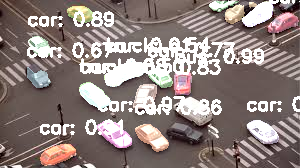

In [ ]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle',
    'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
    'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant',
    'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven',
    'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def detect_objects_with_masks(image_path, confidence_threshold=0.5):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)

    with torch.no_grad():
        predictions = model(image_tensor)

    boxes = predictions[0]['boxes'].cpu().numpy()
    labels = predictions[0]['labels'].cpu().numpy()
    scores = predictions[0]['scores'].cpu().numpy()
    masks = predictions[0]['masks'].cpu().numpy()

    object_counts = {}
    image_np = np.array(image)
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    for i, box in enumerate(boxes):
        if scores[i] >= confidence_threshold:
            label = COCO_INSTANCE_CATEGORY_NAMES[labels[i]]
            mask = masks[i, 0]
            binary_mask = mask > confidence_threshold

            if label in object_counts:
                object_counts[label] += 1
            else:
                object_counts[label] = 1

            color = np.random.randint(128, 255, size=(3,), dtype=np.uint8)  # Bright colors for masks
            colored_mask = np.zeros_like(image_np, dtype=np.uint8)
            colored_mask[binary_mask] = color

            image_np = cv2.addWeighted(image_np, 1, colored_mask, 0.6, 0)

            text_position = (int(box[0]), int(box[1]) - 10)
            label_text = f"{label}: {scores[i]:.2f}"
            cv2.putText(image_np, label_text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    print("Detected objects:")
    for label, count in object_counts.items():
        print(f"{label}: {count}")

    return image_np, object_counts

if __name__ == "__main__":
    IMAGE_PATH = "/content/download (2).jpg"
    detected_image, object_counts = detect_objects_with_masks(IMAGE_PATH)

    if detected_image is not None:
        cv2_imshow(detected_image)


Epoch 1/4
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 50ms/step - accuracy: 0.4434 - loss: 1.4811 - val_accuracy: 0.8829 - val_loss: 0.3824
Epoch 2/4
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.8450 - loss: 0.5310 - val_accuracy: 0.8990 - val_loss: 0.4003
Epoch 3/4
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 69s 49ms/step - accuracy: 0.8880 - loss: 0.4184 - val_accuracy: 0.9275 - val_loss: 0.3028
Epoch 4/4
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 67s 47ms/step - accuracy: 0.9103 - loss: 0.3456 - val_accuracy: 0.9473 - val_loss: 0.2024
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9435 - loss: 0.2141
Test Loss: 0.1880, Test Accuracy: 0.9518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Predicted Digit: 0


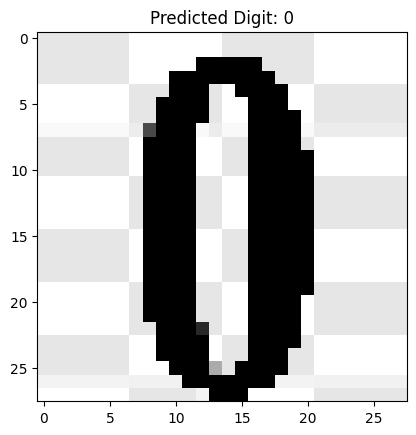

In [2]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

model = Sequential([
    SimpleRNN(256, input_shape=(28, 28), activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=4, validation_data=(x_val, y_val))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

image_path = '/content/digit.png'
image = cv2.imread(image_path)

if image is not None:
    image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (28, 28)) / 255.0
    image = np.expand_dims(image, axis=-1).reshape(1, 28, 28, 1)
    output = model.predict(image)
    predicted_class = np.argmax(output)
    print(f"Predicted Digit: {predicted_class}")
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit: {predicted_class}')
    plt.show()
else:
    print(f"Error loading image: {image_path}")
